# Project - Data Cleaning

## Introduction
In this lab, we'll make use of everything we've learned about pandas, data cleaning, and exploratory data analysis. In order to complete this lab, you'll have to import, clean, combine, reshape, and visualize data to answer questions provided, as well as your own questions!

## Objectives
You will be able to:
- Use different types of joins to merge DataFrames 
- Identify missing values in a dataframe using built-in methods 
- Evaluate and execute the best strategy for dealing with missing, duplicate, and erroneous values for a given dataset 
- Inspect data for duplicates or extraneous values and remove them 


## The dataset
In this lab, we'll work with the comprehensive [Super Heroes Dataset](https://www.kaggle.com/claudiodavi/superhero-set/data), which can be found on Kaggle!


## Getting Started

In the cell below:

* Import and alias pandas as `pd`
* Import and alias numpy as `np`
* Import and alias seaborn as `sns`
* Import and alias matplotlib.pyplot as `plt`
* Set matplotlib visualizations to display inline in the notebook

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

For this lab, our dataset is split among two different sources -- `'heroes_information.csv'` and `'super_hero_powers.csv'`.

Use pandas to read in each file and store them in DataFrames in the appropriate variables below. Then, display the `.head()` of each to ensure that everything loaded correctly.  

In [2]:
heroes_df = pd.read_csv('heroes_information.csv')
powers_df = pd.read_csv('super_hero_powers.csv')

display(heroes_df.head())
display(powers_df.head())

,Unnamed: 0,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,3-D Man,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,True,True,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Abin Sur,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Abomination,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


It looks as if the heroes information dataset contained an index column.  We did not specify that this dataset contained an index column, because we hadn't seen it yet. Pandas does not know how to tell apart an index column from any other data, so it stored it with the column name `Unnamed: 0`.  

Our DataFrame provided row indices by default, so this column is not needed.  Drop it from the DataFrame in place in the cell below, and then display the head of `heroes_df` to ensure that it worked properly. 

In [3]:
heroes_df.drop('Unnamed: 0', inplace=True, axis=1)
heroes_df.head()

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


## Familiarize yourself with the dataset

The first step in our Exploratory Data Analysis will be to get familiar with the data.  This step includes:

* Understanding the dimensionality of your dataset
* Investigating what type of data it contains, and the data types used to store it
* Discovering how missing values are encoded, and how many there are
* Getting a feel for what information it does and doesn't contain

In the cell below, get the descriptive statistics of each DataFrame.  

In [4]:
# heroes_df.info()
heroes_df.describe()
heroes_df.isna().any()

pd.set_option('display.max_columns', None)
pd.set_option('max_rows', None)

## Dealing with missing values

Starting in the cell below, detect and deal with any missing values in either DataFrame. Then, explain your methodology for detecting and dealing with outliers in the markdown section below. Be sure to explain your strategy for dealing with missing values in numeric columns, as well as your strategy for dealing with missing values in non-numeric columns.  

Note that if you need to add more cells to write code in, you can do this by:

**1.** Highlighting a cell and then pressing `ESC` to enter command mode.  
**2.** Press `A` to add a cell above the highlighted cell, or `B` to add a cell below the highlighted cell. 

Describe your strategy below this line:
____________________________________________________________________________________________________________________________




In [5]:
#check and clean heroes_df for missing values
heroes_df.isna().any()

name          False
Gender        False
Eye color     False
Race          False
Hair color    False
Height        False
Publisher      True
Skin color    False
Alignment     False
Weight         True
dtype: bool

In [6]:
#there are missing values in the Publisher attribute and the Weight Attribute
#number of missing values
heroes_df.isna().sum()
display(heroes_df.info())
heroes_df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734 entries, 0 to 733
Data columns (total 10 columns):
name          734 non-null object
Gender        734 non-null object
Eye color     734 non-null object
Race          734 non-null object
Hair color    734 non-null object
Height        734 non-null float64
Publisher     719 non-null object
Skin color    734 non-null object
Alignment     734 non-null object
Weight        732 non-null float64
dtypes: float64(2), object(8)
memory usage: 57.5+ KB


None

name           0
Gender         0
Eye color      0
Race           0
Hair color     0
Height         0
Publisher     15
Skin color     0
Alignment      0
Weight         2
dtype: int64

In [7]:
#there are 15 missing values in Publisher and 2 in Weight (publisher is categorical and weight is numeric)
#handle missing values in the Publisher column
#check unique values
heroes_df['Publisher'].unique()
heroes_df['Publisher'].value_counts()

#check movie titles for missing publishers
heroes_df.loc[heroes_df['Publisher'].isna()]['Publisher']

#because there are only 15 missing values, we could fill in manually by looking up the publisher
#going to leave an NA column because it is categorical data, and filling in with the most common publisher name seems erroneous


46     NaN
86     NaN
138    NaN
175    NaN
204    NaN
244    NaN
263    NaN
286    NaN
348    NaN
354    NaN
381    NaN
389    NaN
393    NaN
542    NaN
658    NaN
Name: Publisher, dtype: object

In [8]:
#replace NaN's in the publisher column with "not_available" to keep the NA category
heroes_df['Publisher'].fillna('not_available', inplace=True)

#check to see if there are any NaN's left
heroes_df['Publisher'].isna().sum()

0

In [9]:
#check remaining missing values
heroes_df.isna().sum()

name          0
Gender        0
Eye color     0
Race          0
Hair color    0
Height        0
Publisher     0
Skin color    0
Alignment     0
Weight        2
dtype: int64

In [10]:
#only remaining missing values are in the weight column
print(heroes_df['Weight'].isna().sum() / (heroes_df['Weight'].count() + 2))

#missing values only correspond to <3% of all entries
#given it is a numerical dataset going to impute using the median, with inplace as True to override existing df
heroes_df['Weight'].fillna(heroes_df['Weight'].median(), inplace=True)


0.0027247956403269754


In [11]:
#check that there are no more remaining missing values in the heroes_df
heroes_df.isna().any()

name          False
Gender        False
Eye color     False
Race          False
Hair color    False
Height        False
Publisher     False
Skin color    False
Alignment     False
Weight        False
dtype: bool

In [12]:
#check powers_df to ensure there are no missing values
powers_df.isna().any()

hero_names                      False
Agility                         False
Accelerated Healing             False
Lantern Power Ring              False
Dimensional Awareness           False
Cold Resistance                 False
Durability                      False
Stealth                         False
Energy Absorption               False
Flight                          False
Danger Sense                    False
Underwater breathing            False
Marksmanship                    False
Weapons Master                  False
Power Augmentation              False
Animal Attributes               False
Longevity                       False
Intelligence                    False
Super Strength                  False
Cryokinesis                     False
Telepathy                       False
Energy Armor                    False
Energy Blasts                   False
Duplication                     False
Size Changing                   False
Density Control                 False
Stamina     

In [13]:
#there are no more missing values

## Joining, Grouping, and Aggregating

In the cell below, join the two DataFrames.  Think about which sort of join you should use, as well as which columns you should join on.  Rename columns and manipulate as needed.  

**_HINT:_** Consider the possibility that the columns you choose to join on contain duplicate entries. If that is the case, devise a strategy to deal with the duplicates.

**_HINT:_** If the join throws an error message, consider setting the column you want to join on as the index for each DataFrame.  

In [14]:
#check entries in both dfs
display(heroes_df.info())
display(powers_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734 entries, 0 to 733
Data columns (total 10 columns):
name          734 non-null object
Gender        734 non-null object
Eye color     734 non-null object
Race          734 non-null object
Hair color    734 non-null object
Height        734 non-null float64
Publisher     734 non-null object
Skin color    734 non-null object
Alignment     734 non-null object
Weight        734 non-null float64
dtypes: float64(2), object(8)
memory usage: 57.5+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Columns: 168 entries, hero_names to Omniscient
dtypes: bool(167), object(1)
memory usage: 114.1+ KB


None

In [15]:
#check for duplicates in heroes_df
duplicates_heroes_df = heroes_df[heroes_df.duplicated()]
print(len(duplicates_heroes_df))


1


In [16]:
#remove duplicates
heroes_df = heroes_df.drop_duplicates()
duplicates_heroes_df = heroes_df[heroes_df.duplicated()]
print(len(duplicates_heroes_df))


0


In [17]:
#not going to drop name duplicates as they could be the same hero from different publishers, etc. and not unique
#check for duplicates in powers_df
duplicates_powers_df = powers_df[powers_df.duplicated()]
print(len(duplicates_powers_df))

0


In [18]:
#check name duplicates in both dataframes
len(heroes_df[heroes_df.duplicated(subset='name')])

18

In [19]:
len(powers_df[powers_df.duplicated(subset='hero_names')])

0

In [20]:
#there are name duplicates in heroes_df - - could be the result of different producers, etc. so not going to remove these
#perform left join on heroes_df, to keep all name duplicates (powers should be same across different names)
#update indexes to be name columns
powers_df.set_index('hero_names', inplace=True)
heroes_df.set_index('name', inplace=True)

display(powers_df.head())
display(heroes_df.head())

,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,Danger Sense,Underwater breathing,Marksmanship,Weapons Master,Power Augmentation,Animal Attributes,Longevity,Intelligence,Super Strength,Cryokinesis,Telepathy,Energy Armor,Energy Blasts,Duplication,Size Changing,Density Control,Stamina,Astral Travel,Audio Control,Dexterity,Omnitrix,Super Speed,Possession,Animal Oriented Powers,Weapon-based Powers,Electrokinesis,Darkforce Manipulation,Death Touch,Teleportation,Enhanced Senses,Telekinesis,Energy Beams,Magic,Hyperkinesis,Jump,Clairvoyance,Dimensional Travel,Power Sense,Shapeshifting,Peak Human Condition,Immortality,Camouflage,Element Control,Phasing,Astral Projection,Electrical Transport,Fire Control,Projection,Summoning,Enhanced Memory,Reflexes,Invulnerability,Energy Constructs,Force Fields,Self-Sustenance,Anti-Gravity,Empathy,Power Nullifier,Radiation Control,Psionic Powers,Elasticity,Substance Secretion,Elemental Transmogrification,Technopath/Cyberpath,Photographic Reflexes,Seismic Power,Animation,Precognition,Mind Control,Fire Resistance,Power Absorption,Enhanced Hearing,Nova Force,Insanity,Hypnokinesis,Animal Control,Natural Armor,Intangibility,Enhanced Sight,Molecular Manipulation,Heat Generation,Adaptation,Gliding,Power Suit,Mind Blast,Probability Manipulation,Gravity Control,Regeneration,Light Control,Echolocation,Levitation,Toxin and Disease Control,Banish,Energy Manipulation,Heat Resistance,Natural Weapons,Time Travel,Enhanced Smell,Illusions,Thirstokinesis,Hair Manipulation,Illumination,Omnipotent,Cloaking,Changing Armor,Power Cosmic,Biokinesis,Water Control,Radiation Immunity,Vision - Telescopic,Toxin and Disease Resistance,Spatial Awareness,Energy Resistance,Telepathy Resistance,Molecular Combustion,Omnilingualism,Portal Creation,Magnetism,Mind Control Resistance,Plant Control,Sonar,Sonic Scream,Time Manipulation,Enhanced Touch,Magic Resistance,Invisibility,Sub-Mariner,Radiation Absorption,Intuitive aptitude,Vision - Microscopic,Melting,Wind Control,Super Breath,Wallcrawling,Vision - Night,Vision - Infrared,Grim Reaping,Matter Absorption,The Force,Resurrection,Terrakinesis,Vision - Heat,Vitakinesis,Radar Sense,Qwardian Power Ring,Weather Control,Vision - X-Ray,Vision - Thermal,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
hero_names,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3-D Man,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
A-Bomb,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,Fa

,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
name,,,,,,,,,
A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


In [21]:
#perform left join 
joined_df = heroes_df.join(powers_df, how='left')

In [22]:
joined_df.head()

,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,Danger Sense,Underwater breathing,Marksmanship,Weapons Master,Power Augmentation,Animal Attributes,Longevity,Intelligence,Super Strength,Cryokinesis,Telepathy,Energy Armor,Energy Blasts,Duplication,Size Changing,Density Control,Stamina,Astral Travel,Audio Control,Dexterity,Omnitrix,Super Speed,Possession,Animal Oriented Powers,Weapon-based Powers,Electrokinesis,Darkforce Manipulation,Death Touch,Teleportation,Enhanced Senses,Telekinesis,Energy Beams,Magic,Hyperkinesis,Jump,Clairvoyance,Dimensional Travel,Power Sense,Shapeshifting,Peak Human Condition,Immortality,Camouflage,Element Control,Phasing,Astral Projection,Electrical Transport,Fire Control,Projection,Summoning,Enhanced Memory,Reflexes,Invulnerability,Energy Constructs,Force Fields,Self-Sustenance,Anti-Gravity,Empathy,Power Nullifier,Radiation Control,Psionic Powers,Elasticity,Substance Secretion,Elemental Transmogrification,Technopath/Cyberpath,Photographic Reflexes,Seismic Power,Animation,Precognition,Mind Control,Fire Resistance,Power Absorption,Enhanced Hearing,Nova Force,Insanity,Hypnokinesis,Animal Control,Natural Armor,Intangibility,Enhanced Sight,Molecular Manipulation,Heat Generation,Adaptation,Gliding,Power Suit,Mind Blast,Probability Manipulation,Gravity Control,Regeneration,Light Control,Echolocation,Levitation,Toxin and Disease Control,Banish,Energy Manipulation,Heat Resistance,Natural Weapons,Time Travel,Enhanced Smell,Illusions,Thirstokinesis,Hair Manipulation,Illumination,Omnipotent,Cloaking,Changing Armor,Power Cosmic,Biokinesis,Water Control,Radiation Immunity,Vision - Telescopic,Toxin and Disease Resistance,Spatial Awareness,Energy Resistance,Telepathy Resistance,Molecular Combustion,Omnilingualism,Portal Creation,Magnetism,Mind Control Resistance,Plant Control,Sonar,Sonic Scream,Time Manipulation,Enhanced Touch,Magic Resistance,Invisibility,Sub-Mariner,Radiation Absorption,Intuitive aptitude,Vision - Microscopic,Melting,Wind Control,Super Breath,Wallcrawling,Vision - Night,Vision - Infrared,Grim Reaping,Matter Absorption,The Force,Resurrection,Terrakinesis,Vision - Heat,Vitakinesis,Radar Sense,Qwardian Power Ring,Weather Control,Vision - X-Ray,Vision - Thermal,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0,True,True,False,False,True,True,False,False,False,False,True,True,True,False,False,True,True,True,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,Fal

In the cell below, subset male and female heroes into different dataframes.  Create a scatterplot of the height and weight of each hero, with weight as the y-axis.  Plot both the male and female heroes subset into each dataframe, and make the color for each point in the scatterplot correspond to the gender of the superhero.

In [23]:
males = joined_df.loc[joined_df['Gender'] == 'Male']
females = joined_df.loc[joined_df['Gender'] == 'Female']

In [24]:
males.head()
females.head()

,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,Danger Sense,Underwater breathing,Marksmanship,Weapons Master,Power Augmentation,Animal Attributes,Longevity,Intelligence,Super Strength,Cryokinesis,Telepathy,Energy Armor,Energy Blasts,Duplication,Size Changing,Density Control,Stamina,Astral Travel,Audio Control,Dexterity,Omnitrix,Super Speed,Possession,Animal Oriented Powers,Weapon-based Powers,Electrokinesis,Darkforce Manipulation,Death Touch,Teleportation,Enhanced Senses,Telekinesis,Energy Beams,Magic,Hyperkinesis,Jump,Clairvoyance,Dimensional Travel,Power Sense,Shapeshifting,Peak Human Condition,Immortality,Camouflage,Element Control,Phasing,Astral Projection,Electrical Transport,Fire Control,Projection,Summoning,Enhanced Memory,Reflexes,Invulnerability,Energy Constructs,Force Fields,Self-Sustenance,Anti-Gravity,Empathy,Power Nullifier,Radiation Control,Psionic Powers,Elasticity,Substance Secretion,Elemental Transmogrification,Technopath/Cyberpath,Photographic Reflexes,Seismic Power,Animation,Precognition,Mind Control,Fire Resistance,Power Absorption,Enhanced Hearing,Nova Force,Insanity,Hypnokinesis,Animal Control,Natural Armor,Intangibility,Enhanced Sight,Molecular Manipulation,Heat Generation,Adaptation,Gliding,Power Suit,Mind Blast,Probability Manipulation,Gravity Control,Regeneration,Light Control,Echolocation,Levitation,Toxin and Disease Control,Banish,Energy Manipulation,Heat Resistance,Natural Weapons,Time Travel,Enhanced Smell,Illusions,Thirstokinesis,Hair Manipulation,Illumination,Omnipotent,Cloaking,Changing Armor,Power Cosmic,Biokinesis,Water Control,Radiation Immunity,Vision - Telescopic,Toxin and Disease Resistance,Spatial Awareness,Energy Resistance,Telepathy Resistance,Molecular Combustion,Omnilingualism,Portal Creation,Magnetism,Mind Control Resistance,Plant Control,Sonar,Sonic Scream,Time Manipulation,Enhanced Touch,Magic Resistance,Invisibility,Sub-Mariner,Radiation Absorption,Intuitive aptitude,Vision - Microscopic,Melting,Wind Control,Super Breath,Wallcrawling,Vision - Night,Vision - Infrared,Grim Reaping,Matter Absorption,The Force,Resurrection,Terrakinesis,Vision - Heat,Vitakinesis,Radar Sense,Qwardian Power Ring,Weather Control,Vision - X-Ray,Vision - Thermal,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
Agent 13,Female,blue,-,Blond,173.0,Marvel Comics,-,good,61.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Angel Dust,Female,yellow,Mutant,Black,165.0,Marvel Comics,-,good,57.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Fa

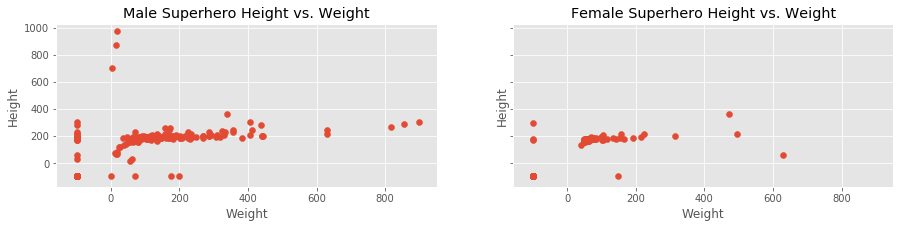

In [25]:

#create subplots for the two scatter plots
plt.style.use('ggplot')
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,3), sharex=True, sharey=True)

male_x = males['Weight']
male_y = males['Height']
axes[0].scatter(male_x, male_y)
axes[0].set_title('Male Superhero Height vs. Weight')
axes[0].set_xlabel('Weight')
axes[0].set_ylabel('Height')

female_x = females['Weight']
female_y = females['Height']
axes[1].scatter(female_x, female_y)
axes[1].set_title('Female Superhero Height vs. Weight')
axes[1].set_xlabel('Weight')
axes[1].set_ylabel('Height')

plt.show()

In [26]:
#values that are negative don't make sense in this context - - replace them with the median
males[males['Weight'] < 0] = males['Weight'].median()
males[males['Height'] < 0] = males['Height'].median()
females[females['Weight'] < 0] = females['Weight'].median()
females[females['Height'] < 0] = females['Height'].median()

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



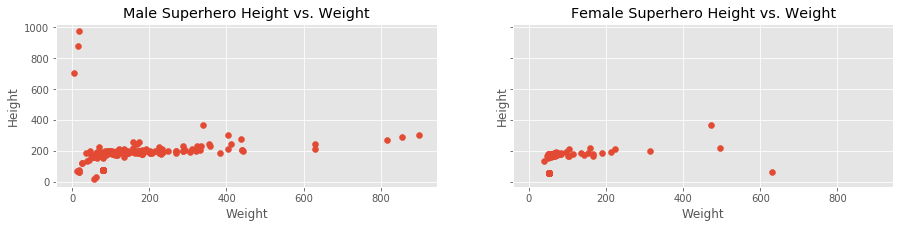

In [27]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,3), sharex=True, sharey=True)

male_x = males['Weight']
male_y = males['Height']
axes[0].scatter(male_x, male_y)
axes[0].set_title('Male Superhero Height vs. Weight')
axes[0].set_xlabel('Weight')
axes[0].set_ylabel('Height')

female_x = females['Weight']
female_y = females['Height']
axes[1].scatter(female_x, female_y)
axes[1].set_title('Female Superhero Height vs. Weight')
axes[1].set_xlabel('Weight')
axes[1].set_ylabel('Height')

plt.show()

Text(0.5, 1.0, 'Superhero Height vs. Weight')

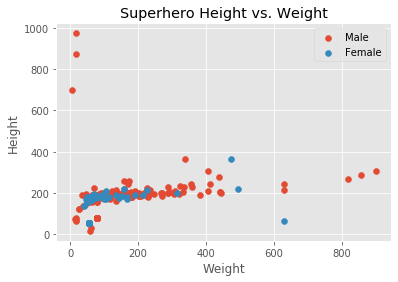

In [28]:
#plot two data sets in one graph
fig, ax = plt.subplots()
ax.scatter(male_x, male_y, label='Male')
ax.scatter(female_x, female_y, label='Female')
plt.legend()
plt.xlabel('Weight')
plt.ylabel('Height')
plt.title('Superhero Height vs. Weight')



In [29]:
joined_df['Height'].count()
joined_df['Weight'].count()
len(joined_df)

733

## Some Initial Investigation

Next, slice the DataFrame as needed and visualize the distribution of heights and weights by gender.  You should have 4 total plots.  

In the cell below:

* Slice the DataFrame into separate DataFrames by gender
* Complete the `show_distplot()` function.  This helper function should take in a DataFrame, a string containing the gender we want to visualize, and the column name we want to visualize by gender. The function should display a distplot visualization from seaborn of the column/gender combination.  

Hint: Don't forget to check the [seaborn documentation for distplot](https://seaborn.pydata.org/generated/seaborn.distplot.html) if you have questions about how to use it correctly! 

In [30]:
male_heroes_df = males
female_heroes_df = females

def show_distplot(dataframe, gender, column_name):
    gender_filtered = dataframe.loc[dataframe['Gender'] == gender]
    sns.distplot(gender_filtered[column_name])

Average: 155.44
Median: 180.0
Standard Deviation: 77.8
Mode: 0    79.0
dtype: float64


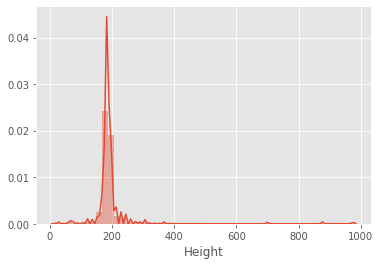

In [31]:
# Male Height
show_distplot(male_heroes_df, 'Male', 'Height')
print("Average: {}".format(round(male_heroes_df['Height'].mean(), 2)))
print("Median: {}".format(round(male_heroes_df['Height'].median(), 2)))
print("Standard Deviation: {}".format(round(male_heroes_df['Height'].std(), 2)))
print("Mode: {}".format(round(male_heroes_df['Height'].mode(), 2)))


Average: 110.83
Median: 79.0
Standard Deviation: 93.39
Mode: 0    79.0
dtype: float64


900.0

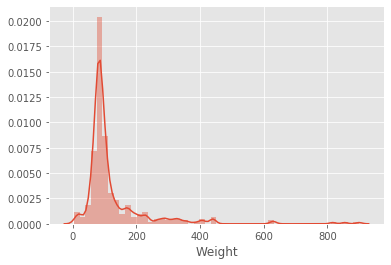

In [32]:
# Male Weight
show_distplot(male_heroes_df, 'Male', 'Weight')
print("Average: {}".format(round(male_heroes_df['Weight'].mean(), 2)))
print("Median: {}".format(round(male_heroes_df['Weight'].median(), 2)))
print("Standard Deviation: {}".format(round(male_heroes_df['Weight'].std(), 2)))
print("Mode: {}".format(round(male_heroes_df['Weight'].mode(), 2)))
male_heroes_df['Weight'].max()

Average: 139.05
Median: 168.0
Standard Deviation: 57.42
Mode: 0    54.0
dtype: float64


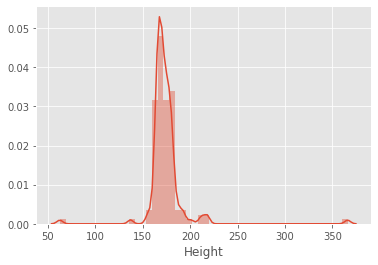

In [33]:
# Female Height
show_distplot(female_heroes_df, 'Female', 'Height')
print("Average: {}".format(round(female_heroes_df['Height'].mean(), 2)))
print("Median: {}".format(round(female_heroes_df['Height'].median(), 2)))
print("Standard Deviation: {}".format(round(female_heroes_df['Height'].std(), 2)))
print("Mode: {}".format(round(female_heroes_df['Height'].mode(), 2)))

Average: 71.73
Median: 54.0
Standard Deviation: 65.9
Mode: 0    54.0
dtype: float64


630.0

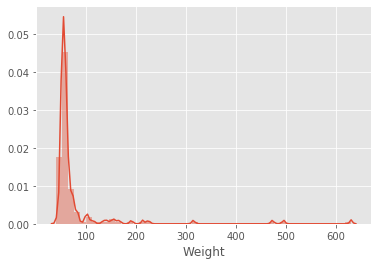

In [34]:
# Female Weight
show_distplot(female_heroes_df, 'Female', 'Weight')
print("Average: {}".format(round(female_heroes_df['Weight'].mean(), 2)))
print("Median: {}".format(round(female_heroes_df['Weight'].median(), 2)))
print("Standard Deviation: {}".format(round(female_heroes_df['Weight'].std(), 2)))
print("Mode: {}".format(round(female_heroes_df['Weight'].mode(), 2)))
female_heroes_df['Weight'].max()

Discuss your findings from the plots above, with respect to the distribution of height and weight by gender.  Your explanation should include a discussion of any relevant summary statistics, including mean, median, mode, and the overall shape of each distribution.  

Write your answer below this line:
____________________________________________________________________________________________________________________________

Looking at Weights First:
1. Average male weight is 125.54 compared to average female weight of 78.34
2. Median male weight is 90 compared to median female weight of 58
3. Std for male weight is 111.02 compared to females of 77.02
Average and median weights for men are higher than those of females.  Male weight appears unimodal, with a slight positive skew.  Female weight appears unimodal with a positive skew as well.  Male weights are more dispersed with a standard deviation of 111 vs. 77 for females.  

Heights:
1. Average male height is 192 compared to females of 173.84
2. Median male height is 185 compared to females of 170
3. Male Height std is 69.61 compared to females of 21.58
Heights appear more similar amongst male and female superheros. Average and median female heights are both within 1 std of average and median male heights.  Female heights are more centered around the median, whereas male heights are positively skewed.  Standard deviation for males in height is ~3x that for females, supporting the claim that male heights are more dispersed and see more variation than those for females.  

### Sample Question: Most Common Powers

The rest of this notebook will be left to you to investigate the dataset by formulating your own questions, and then seeking answers using pandas and numpy.  Every answer should include some sort of visualization, when appropriate. Before moving on to formulating your own questions, use the dataset to answer the following questions about superhero powers:

* What are the 5 most common powers overall?
* What are the 5 most common powers in the Marvel Universe?
* What are the 5 most common powers in the DC Universe?

In [35]:
joined_df.head()

,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,Danger Sense,Underwater breathing,Marksmanship,Weapons Master,Power Augmentation,Animal Attributes,Longevity,Intelligence,Super Strength,Cryokinesis,Telepathy,Energy Armor,Energy Blasts,Duplication,Size Changing,Density Control,Stamina,Astral Travel,Audio Control,Dexterity,Omnitrix,Super Speed,Possession,Animal Oriented Powers,Weapon-based Powers,Electrokinesis,Darkforce Manipulation,Death Touch,Teleportation,Enhanced Senses,Telekinesis,Energy Beams,Magic,Hyperkinesis,Jump,Clairvoyance,Dimensional Travel,Power Sense,Shapeshifting,Peak Human Condition,Immortality,Camouflage,Element Control,Phasing,Astral Projection,Electrical Transport,Fire Control,Projection,Summoning,Enhanced Memory,Reflexes,Invulnerability,Energy Constructs,Force Fields,Self-Sustenance,Anti-Gravity,Empathy,Power Nullifier,Radiation Control,Psionic Powers,Elasticity,Substance Secretion,Elemental Transmogrification,Technopath/Cyberpath,Photographic Reflexes,Seismic Power,Animation,Precognition,Mind Control,Fire Resistance,Power Absorption,Enhanced Hearing,Nova Force,Insanity,Hypnokinesis,Animal Control,Natural Armor,Intangibility,Enhanced Sight,Molecular Manipulation,Heat Generation,Adaptation,Gliding,Power Suit,Mind Blast,Probability Manipulation,Gravity Control,Regeneration,Light Control,Echolocation,Levitation,Toxin and Disease Control,Banish,Energy Manipulation,Heat Resistance,Natural Weapons,Time Travel,Enhanced Smell,Illusions,Thirstokinesis,Hair Manipulation,Illumination,Omnipotent,Cloaking,Changing Armor,Power Cosmic,Biokinesis,Water Control,Radiation Immunity,Vision - Telescopic,Toxin and Disease Resistance,Spatial Awareness,Energy Resistance,Telepathy Resistance,Molecular Combustion,Omnilingualism,Portal Creation,Magnetism,Mind Control Resistance,Plant Control,Sonar,Sonic Scream,Time Manipulation,Enhanced Touch,Magic Resistance,Invisibility,Sub-Mariner,Radiation Absorption,Intuitive aptitude,Vision - Microscopic,Melting,Wind Control,Super Breath,Wallcrawling,Vision - Night,Vision - Infrared,Grim Reaping,Matter Absorption,The Force,Resurrection,Terrakinesis,Vision - Heat,Vitakinesis,Radar Sense,Qwardian Power Ring,Weather Control,Vision - X-Ray,Vision - Thermal,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0,True,True,False,False,True,True,False,False,False,False,True,True,True,False,False,True,True,True,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,Fal

In [36]:
joined_df.columns

Index(['Gender', 'Eye color', 'Race', 'Hair color', 'Height', 'Publisher',
       'Skin color', 'Alignment', 'Weight', 'Agility',
       ...
       'Web Creation', 'Reality Warping', 'Odin Force', 'Symbiote Costume',
       'Speed Force', 'Phoenix Force', 'Molecular Dissipation',
       'Vision - Cryo', 'Omnipresent', 'Omniscient'],
      dtype='object', length=176)

In [37]:
joined_df.columns[9]
joined_df['Agility'].sum()
joined_df['Terrakinesis'].sum()

2

In [38]:
def top_powers(dataframe):
    power_count = {}
    for i in range(9, len(dataframe.columns)):
        col_name = dataframe.columns[i]
        count = dataframe[col_name].sum()
        power_count.update({col_name: count})

    return sorted(power_count.items(), key=lambda x: x[1], reverse=True)[:5]
    
    

In [39]:
top_powers(joined_df)


[('Super Strength', 362),
 ('Stamina', 294),
 ('Durability', 262),
 ('Super Speed', 251),
 ('Agility', 244)]

In [40]:
#split dfs into marvel and dc
marvel_df = joined_df[joined_df['Publisher'] == 'Marvel Comics']
dc_df = joined_df[joined_df['Publisher'] == 'DC Comics']


In [41]:
#marvel top super powers
top_powers(marvel_df)

[('Super Strength', 204),
 ('Durability', 154),
 ('Stamina', 150),
 ('Super Speed', 137),
 ('Agility', 126)]

In [42]:
#dc top super powers
top_powers(dc_df)

[('Super Strength', 109),
 ('Stamina', 90),
 ('Flight', 86),
 ('Super Speed', 79),
 ('Agility', 71)]

Analyze the results you found above to answer the following question:

How do the top 5 powers in the Marvel and DC universes compare?  Are they similar, or are there significant differences? How do they compare to the overall trends in the entire Superheroes dataset?

Write your answer below this line:
____________________________________________________________________________________________________________________________

The top 5 powers in the Marvel and DC universes are similar.  The number 1 most common power for both is "Super Strength". Outside of the most common super power, 'Stamina', 'Super Speed', and 'Agility' all show up in both Marvel and DC's top 5.  'Flight' is a top power in DC but not one of the top 5 at Marvel.  Similarly, 'Durability' is Marvel's 2nd most common power, but does not show up in DC's top 5. Both Marvel and DC's top 5 see 'Super Speed' and 'Agility' as the 4th and 5th most common powers. 

Marvel movies seem most in line with all movies -- they both share the same 5 most common powers, and all are ranked similarly.  Marvel sees more heros with 'Durability' than 'Stamina', which is reversed when looking at all movies.  Again, Agility and Super Speed for both Marvel and DC are in line with all movies, ranking 4th and 5th most common, respectively

### Your Own Investigation

For the remainder of this lab, you'll be focusing on coming up with and answering your own question, just like we did above.  Your question should not be overly simple, and should require both descriptive statistics and data visualization to answer.  In case you're unsure of what questions to ask, some sample questions have been provided below.

Pick one of the following questions to investigate and answer, or come up with one of your own!

* Which powers have the highest chance of co-occurring in a hero (e.g. super strength and flight), and does this differ by gender?
* Is there a relationship between a hero's height and weight and their powerset?
* What is the distribution of skin colors amongst alien heroes?

Explain your question below this line:
____________________________________________________________________________________________________________________________

Question to tackle: is there a relationship between a hero's height and weight and their powerset?  How does this change between genders 

Some sample cells have been provided to give you room to work. If you need to create more cells, you can do this easily by:

1. Highlighting a cell and then pressing `esc` to enter command mode.
1. Pressing `b` to add a cell below the currently highlighted cell, or `a` to add one above it.  

Be sure to include thoughtful, well-labeled visualizations to back up your analysis!

In [43]:
#is there a relationship between a hero's height and weight and their powerset?  how does this change between genders.
#height is represented in centimeters
#weight represented in pounds


In [44]:
#convert weight to kg
divisor = 2.2046
def pounds_to_kg(pounds):
    return pounds / divisor

joined_df['Weight'] = joined_df['Weight'].map(pounds_to_kg)

In [45]:
joined_df.head()

,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,Danger Sense,Underwater breathing,Marksmanship,Weapons Master,Power Augmentation,Animal Attributes,Longevity,Intelligence,Super Strength,Cryokinesis,Telepathy,Energy Armor,Energy Blasts,Duplication,Size Changing,Density Control,Stamina,Astral Travel,Audio Control,Dexterity,Omnitrix,Super Speed,Possession,Animal Oriented Powers,Weapon-based Powers,Electrokinesis,Darkforce Manipulation,Death Touch,Teleportation,Enhanced Senses,Telekinesis,Energy Beams,Magic,Hyperkinesis,Jump,Clairvoyance,Dimensional Travel,Power Sense,Shapeshifting,Peak Human Condition,Immortality,Camouflage,Element Control,Phasing,Astral Projection,Electrical Transport,Fire Control,Projection,Summoning,Enhanced Memory,Reflexes,Invulnerability,Energy Constructs,Force Fields,Self-Sustenance,Anti-Gravity,Empathy,Power Nullifier,Radiation Control,Psionic Powers,Elasticity,Substance Secretion,Elemental Transmogrification,Technopath/Cyberpath,Photographic Reflexes,Seismic Power,Animation,Precognition,Mind Control,Fire Resistance,Power Absorption,Enhanced Hearing,Nova Force,Insanity,Hypnokinesis,Animal Control,Natural Armor,Intangibility,Enhanced Sight,Molecular Manipulation,Heat Generation,Adaptation,Gliding,Power Suit,Mind Blast,Probability Manipulation,Gravity Control,Regeneration,Light Control,Echolocation,Levitation,Toxin and Disease Control,Banish,Energy Manipulation,Heat Resistance,Natural Weapons,Time Travel,Enhanced Smell,Illusions,Thirstokinesis,Hair Manipulation,Illumination,Omnipotent,Cloaking,Changing Armor,Power Cosmic,Biokinesis,Water Control,Radiation Immunity,Vision - Telescopic,Toxin and Disease Resistance,Spatial Awareness,Energy Resistance,Telepathy Resistance,Molecular Combustion,Omnilingualism,Portal Creation,Magnetism,Mind Control Resistance,Plant Control,Sonar,Sonic Scream,Time Manipulation,Enhanced Touch,Magic Resistance,Invisibility,Sub-Mariner,Radiation Absorption,Intuitive aptitude,Vision - Microscopic,Melting,Wind Control,Super Breath,Wallcrawling,Vision - Night,Vision - Infrared,Grim Reaping,Matter Absorption,The Force,Resurrection,Terrakinesis,Vision - Heat,Vitakinesis,Radar Sense,Qwardian Power Ring,Weather Control,Vision - X-Ray,Vision - Thermal,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,200.036288,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,29.483807,True,True,False,False,True,True,False,False,False,False,True,True,True,False,False,True,True,True,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False

In [46]:
#add height in meters squared column
joined_df['height_m_squared'] = joined_df['Height'].map(lambda x: (x/100) ** 2)

In [47]:
#create BMI column
joined_df['BMI'] = joined_df['Weight'] / joined_df['height_m_squared']


In [48]:
#remove negative BMI
bmi_df = joined_df[joined_df['BMI'] >= 0]

In [49]:
bmi_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 497 entries, A-Bomb to Zoom
Columns: 178 entries, Gender to BMI
dtypes: float64(4), object(174)
memory usage: 695.0+ KB


In [50]:
bmi_df['BMI'].describe()

count     497.000000
mean       18.452304
std        61.881279
min         0.036923
25%         9.331139
50%        11.309861
75%        13.860479
max      1138.704441
Name: BMI, dtype: float64

In [51]:
#split bmi dataframe into 2 categories based on BMI
light_bmi_df = bmi_df[bmi_df['BMI'] < 11.3]
heavy_bmi_df = bmi_df[bmi_df['BMI'] >= 11.3]

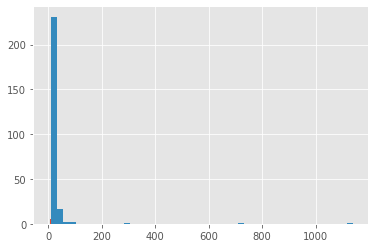

In [52]:
#evaluate histograms of BMI
light_bmi_df['BMI'].hist(bins = 50)
heavy_bmi_df['BMI'].hist(bins = 50)

## Summary

In this lab, we demonstrated our mastery of:
* Using all of our Pandas knowledge to date to clean the dataset and deal with null values
* Using Queries and aggregations to group the data into interesting subsets as needed
* Using descriptive statistics and data visualization to find answers to questions we may have about the data

In [62]:
#drop BMI and meters squared columns
light_heros_df = light_bmi_df.drop(['BMI', 'height_m_squared'], axis=1)
heavy_heros_df = heavy_bmi_df.drop(['BMI', 'height_m_squared'], axis=1)

In [63]:
#top most common powers for light heros
top_powers(light_heros_df)

[('Super Strength', 107),
 ('Agility', 94),
 ('Stamina', 87),
 ('Flight', 79),
 ('Super Speed', 78)]

In [64]:
#top most common powers for heavy heros
top_powers(heavy_heros_df)

[('Super Strength', 173),
 ('Stamina', 147),
 ('Durability', 136),
 ('Super Speed', 122),
 ('Agility', 104)]

In [65]:
#split light and heavy df's into female and male
light_female_heros_df = light_heros_df[light_heros_df['Gender'] == 'Female']
heavy_female_heros_df = heavy_heros_df[heavy_heros_df['Gender'] == 'Female']

light_male_heros_df = light_heros_df[light_heros_df['Gender'] == 'Male']
heavy_male_heros_df = heavy_heros_df[heavy_heros_df['Gender'] == 'Male']

In [66]:
#top 5 powers for light female super heros
top_powers(light_female_heros_df)

[('Super Strength', 57),
 ('Agility', 48),
 ('Flight', 42),
 ('Stamina', 41),
 ('Super Speed', 37)]

In [67]:
#top 5 powers for heavy female super heros
top_powers(heavy_female_heros_df)

[('Super Strength', 20),
 ('Durability', 16),
 ('Stamina', 14),
 ('Super Speed', 13),
 ('Reflexes', 12)]

In [68]:
#top 5 powers for light male super heros
top_powers(light_male_heros_df)

[('Super Strength', 48),
 ('Stamina', 45),
 ('Agility', 44),
 ('Durability', 40),
 ('Super Speed', 39)]

In [69]:
#top 5 powers for heavy male super heros
top_powers(heavy_male_heros_df)

[('Super Strength', 150),
 ('Stamina', 131),
 ('Durability', 116),
 ('Super Speed', 109),
 ('Agility', 93)]

I have split the dataset into light and heavy, by calculating BMI.  Then I split the heavy light datasets into male / female.  It's interesting to note that Durabilty only appears in the top five powers for larger BMI superheros, whereas Flight only appears in the tope five powers for light BMI female superheros

In [73]:
#Question 2: What is the split of superheros with flight by gender?
#create dataset by those that have Flight and what are the weight distributions?
flight_df = joined_df[joined_df['Flight'] == True]

In [74]:
flight_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 212 entries, Abraxas to Yellowjacket II
Columns: 178 entries, Gender to BMI
dtypes: float64(4), object(174)
memory usage: 296.5+ KB


In [90]:
female_flight_df = flight_df[flight_df['Gender'] == 'Female']
male_flight_df = flight_df[flight_df['Gender'] == 'Male']



In [91]:
#percent of all females that can fly
female_flight_df['Gender'].count() / females['Gender'].count()

0.27

In [92]:
#27% of females included in this data set can fly
#compare that to males
male_flight_df['Gender'].count() / males['Gender'].count()

0.2976190476190476

Text(0.5, 1.0, 'Weights of Male Superheros that can Fly')

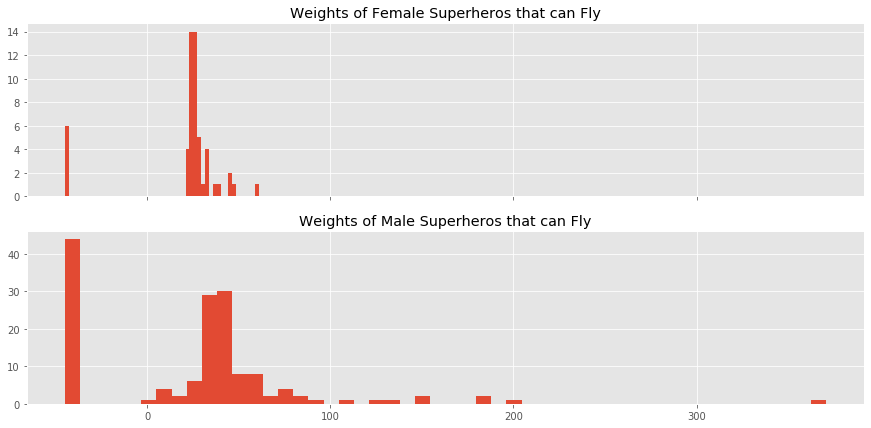

In [104]:
#~30% of male heros included in this data set can fly
#plot weight histograms for female flight vs. all females
#plot weight histograms for male flight vs. all males

fig, ax = plt.subplots(ncols=1, nrows=2, figsize=(15,7), sharex=True)
ax[0].hist(female_flight_df['Weight'], bins=50)
ax[0].set_title('Weights of Female Superheros that can Fly')
ax[1].hist(male_flight_df['Weight'], bins=50)
ax[1].set_title('Weights of Male Superheros that can Fly')

In [105]:
#remove negative weight values and run again
male_flight_df = male_flight_df[male_flight_df['Weight'] > 0]
female_flight_df = female_flight_df[female_flight_df['Weight'] > 0]

Text(0.5, 0, 'Weight')

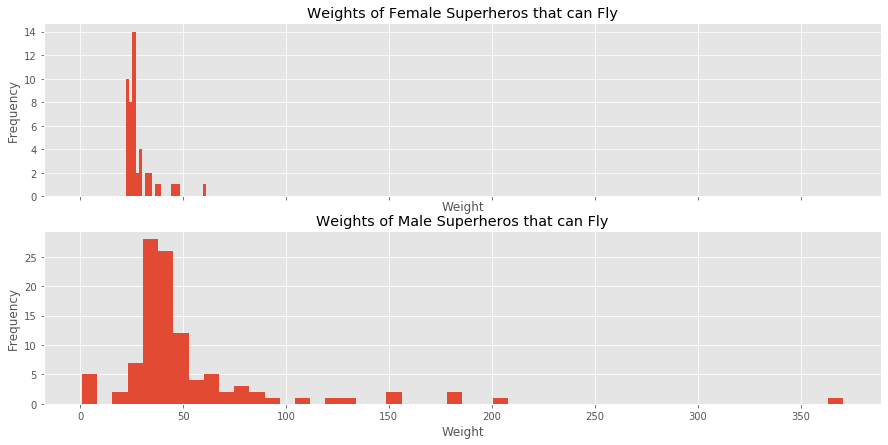

In [110]:
fig, ax = plt.subplots(ncols=1, nrows=2, figsize=(15,7), sharex=True)
ax[0].hist(female_flight_df['Weight'], bins=25)
ax[0].set_title('Weights of Female Superheros that can Fly')
ax[0].set_ylabel('Frequency')
ax[0].set_xlabel('Weight')
ax[1].hist(male_flight_df['Weight'], bins=50)
ax[1].set_title('Weights of Male Superheros that can Fly')
ax[1].set_ylabel('Frequency')
ax[1].set_xlabel('Weight')

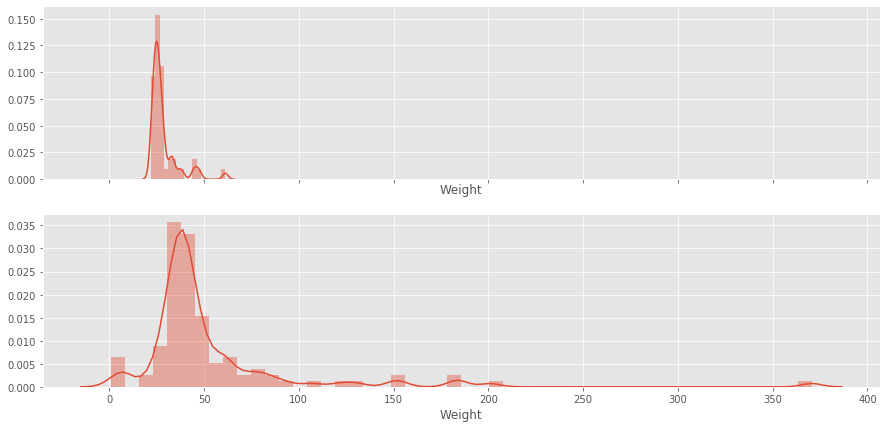

In [112]:
fig, ax = plt.subplots(ncols=1, nrows=2, figsize=(15,7), sharex=True)

#create distplot subplots
sns.distplot(female_flight_df['Weight'], ax=ax[0])
sns.distplot(male_flight_df['Weight'], ax=ax[1])

Looking at the above, male weights for those superheros that can fly are far more distributed (female flights are more centered around the mean), while male weights have a positive skew

In [114]:
male_flight_df['Weight'].std()

46.585170420941466

In [115]:
female_flight_df['Weight'].std()

7.643240162914602

In [118]:
male_flight_df['Weight'].median()


40.59693368411503

In [117]:
female_flight_df['Weight'].median()

25.855030391000632

Male weights for those that can fly is nearly twice as large as females